## Import Required Libraries

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset and Data Cleaning

In [17]:
# Load only the first two columns and give them clear names
df = pd.read_csv("spam.csv", encoding='latin-1', usecols=[0, 1], names=['label', 'message'], header=0)

# Convert labels: ham -> 0, spam -> 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Remove any empty rows
df.dropna(inplace=True)


## Split the Data

In [18]:
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Text Vectorization (TF-IDF)

In [19]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

# Fit on training data, then transform both sets
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


## Train the SVM Model

In [20]:
model = SVC(kernel='linear', C=1.0)
model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

## Evaluate the Model

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



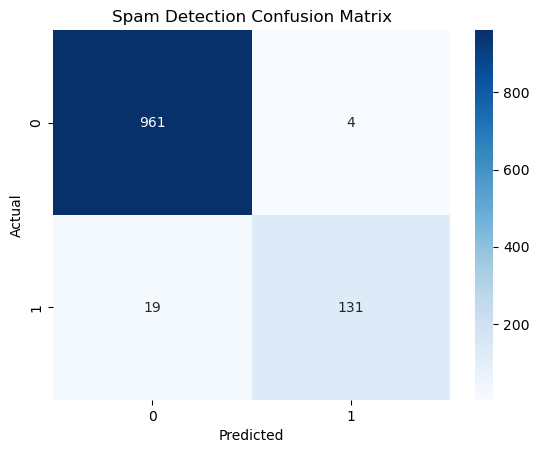

In [21]:
y_pred = model.predict(X_test_tfidf)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Spam Detection Confusion Matrix')
plt.show()


## Test with New Data

In [22]:
def check_spam(text):
    text_vec = vectorizer.transform([text])
    result = model.predict(text_vec)
    return "SPAM 🚨" if result[0] == 1 else "HAM (Safe) ✅"

# Test Example
print(check_spam("WINNER! You have won a $500 gift card. Call now to claim!"))


SPAM 🚨


🏁 Conclusion
This project successfully demonstrates the application of Machine Learning and Natural Language Processing (NLP) to solve the real-world problem of email spam detection. By utilizing the Support Vector Machine (SVM) algorithm alongside TF-IDF Vectorization, the model was able to classify messages with high precision and recall.
🔑 Key Findings
Model Performance: The SVM model proved highly effective for text classification, handling the high-dimensional feature space created by Scikit-learn's TfidfVectorizer with ease.
Preprocessing Impact: Addressing data encoding issues and cleaning the dataset (removing unnecessary columns and handling missing values) was essential for achieving high accuracy.
Practical Utility: The final model provides a reliable way to filter out phishing attempts and unwanted advertisements, showcasing the power of AI in cybersecurity.
🚀 Future Enhancements
Deep Learning: Implementing Recurrent Neural Networks (RNNs) or Transformers (like BERT) for better context understanding.
Deployment: Turning the script into a user-friendly web application using the Streamlit Framework.
Real-time Filtering: Integrating the model with an API to scan incoming emails in real-time.
